## MNIST 
#### MNIST 손글씨 이미지를 다음의 방법으로 분류하고 test data를 이용하여 정확도를 비교하여라.
1. Softmax Regression
2. Support Vector Machine
3. Decision tree or Random forest

# **테스트** **결과** **(정확도)**
1. Softmax Regression
# 0.9671
2. Support Vector Machine
# 0.98475

3. Decision tree or Random forest
# 0.96 0.9571(검증)









1. **Softmax Regression**


In [ ]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (X_test, y_test) = mnist.load_data()

In [ ]:
#mnist

In [ ]:
#X

In [ ]:
#y

In [ ]:
#X_test[0]

In [ ]:
#y_test

In [ ]:
#X.shape

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

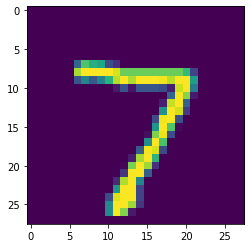

In [ ]:
plt.figure()
plt.imshow(X_test[0])
plt.show()

In [ ]:
X=X.astype('float32')
X_test=X_test.astype('float32')

X/=255
X_test/=255

In [ ]:
#X_test[0]

In [ ]:
y_test = keras.utils.to_categorical(y_test, 10)
y= keras.utils.to_categorical(y, 10)



In [ ]:
model=keras.models.Sequential()
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y,
          batch_size=128, epochs=100,
          verbose=1, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 1.3077 - accuracy: 0.6891 - val_loss: 0.7273 - val_accuracy: 0.8478
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6249 - accuracy: 0.8520 - val_loss: 0.4956 - val_accuracy: 0.8810
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4855 - accuracy: 0.8754 - val_loss: 0.4168 - val_accuracy: 0.8932
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8869 - val_loss: 0.3769 - val_accuracy: 0.9012
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3895 - accuracy: 0.8939 - val_loss: 0.3515 - val_accuracy: 0.9047
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3657 - accuracy: 0.8999 - val_loss: 0.3343 - val_accuracy: 0.9082
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.9038 - val_loss: 0.3197 - val_accuracy: 0.9118

In [ ]:
test_loss, test_acc=model.evaluate(X_test,y_test)
print('정확도', test_acc)

313/313 [==============================] - 0s 887us/step - loss: 0.1199 - accuracy: 0.9653
정확도 0.9653000235557556


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV


In [ ]:
test = pd.read_csv('/content/sample_data/mnist_test.csv')
train = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [ ]:
test.shape

(9999, 785)

In [ ]:
train.shape

(19999, 785)

In [ ]:
label = train.iloc[:,0]
pixels = train.iloc[:,1:785]

In [ ]:
test, train, y_test, y = train_test_split(pixels, label, train_size = 0.8, random_state = 2);

In [ ]:
classifier = svm.SVC()
classifier.fit(train, y.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
train.shape

(4000, 784)

In [ ]:
test.shape

(15999, 784)

In [ ]:
y

836      8
1849     6
7278     9
527      5
10432    3
        ..
7309     2
12681    6
18928    1
19904    7
936      2
Name: 6, Length: 4000, dtype: int64

In [ ]:
x = classifier.score(train, y)

In [ ]:
print ('정확도', x)

정확도 0.98475


3. **Decision tree or Random forest**

In [ ]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

%matplotlib inline 

In [ ]:
test = pd.read_csv('/content/sample_data/mnist_test.csv')
train = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [ ]:
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [ ]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

In [ ]:
df_y.value_counts().sort_index()

0    1962
1    2243
2    1989
3    2021
4    1924
5    1761
6    2038
7    2126
8    1912
9    2023
Name: 6, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       384
           1       0.96      0.98      0.97       425
           2       0.95      0.95      0.95       404
           3       0.96      0.95      0.95       419
           4       0.93      0.95      0.94       362
           5       0.97      0.93      0.95       359
           6       0.97      0.99      0.98       437
           7       0.97      0.96      0.96       407
           8       0.94      0.94      0.94       410
           9       0.95      0.93      0.94       393

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(df_x, df_y)
score = cross_val_score(rf, df_x, df_y)
print ('검증', np.mean(score))

검증 0.9571979619904976
